##### Installing Libraries

First we will install the pingouin library.

- Pingouin is an open-source statistical package written in Python 3 and based mostly on Pandas and NumPy

reference:

https://pingouin-stats.org/build/html/index.html

In [4]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

from scipy.stats import ttest_ind
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import warnings

warnings.filterwarnings('ignore') # hide warning for better reading
plt.rcParams['figure.figsize'] = (20, 10) # set image size to get a clear view

### Part 1

Loading grid system demand data.
Fixing Day-Light saving issues and  missing values using linear interpolation. Plot and carefully label the time series of energy demand during 2014.

In [5]:

# Load data into a pandas dataframe
data_path = "./EirGridSystemDemand2014.csv"
demand_df = pd.read_csv(data_path)
demand_df

,Date,Time,Demand
0,1/1/2014,0:00,2899.0
1,1/1/2014,0:15,2869.0
2,1/1/2014,0:30,2827.0
3,1/1/2014,0:45,2787.0
4,1/1/2014,1:00,2724.0
...,...,...,...
35035,12/31/2014,22:45,2779.0
35036,12/31/2014,23:00,2876.0
35037,12/31/2014,23:15,2961.0
35038,12/31/2014,23:30,2957.0


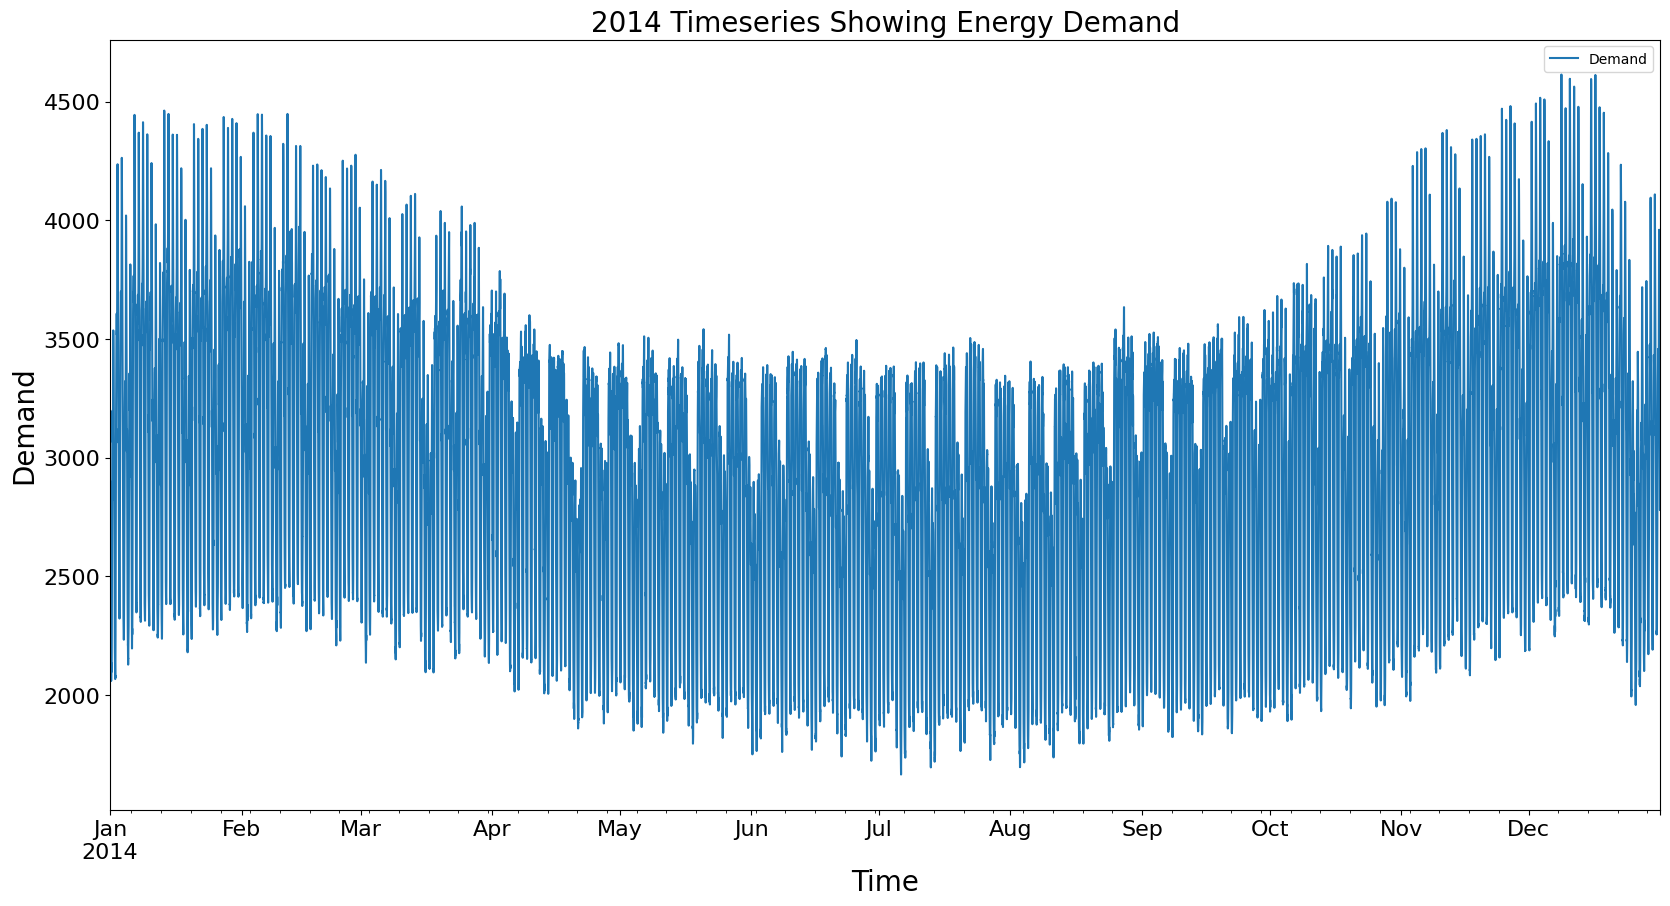

In [6]:
# Perform linear interpolation to fix day-light saving issues and missing values
demand_df = demand_df.interpolate()

# Create a datetime column from 'Date' and 'Time'
demand_df['timestamp'] = pd.to_datetime(demand_df['Date'] + ' ' + demand_df['Time'], format="%m/%d/%Y %H:%M")

# Keep only the 'timestamp' and 'Demand' columns
demand_df = demand_df[['timestamp', 'Demand']]

# Plot the demand data as a function of time
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16)
ax = demand_df.plot.line(x='timestamp', y='Demand')
ax.set_title("2014 Timeseries Showing Energy Demand",size=20)
ax.set_xlabel("Time",size=20)
ax.set_ylabel("Demand",size=20)

# Show the plot
plt.show()


In [7]:
max_ern = demand_df['Demand'].max()

min_ern = demand_df['Demand'].min()

print('The maximum energy demand throughout the whole year is: ', max_ern, 'kWh')

print('The minimum energy demand throughout the whole year is: ', min_ern, 'kWh')


The maximum energy demand throughout the whole year is:  4614.0 kWh
The minimum energy demand throughout the whole year is:  1665.0 kWh


In [8]:
demand_df.sample(10)

,timestamp,Demand
29434,2014-11-03 14:30:00,3410.0
23747,2014-09-05 08:45:00,3241.0
30692,2014-11-16 17:00:00,3527.0
11346,2014-04-29 04:30:00,2030.0
26931,2014-10-08 12:45:00,3478.0
16443,2014-06-21 06:45:00,1992.0
19672,2014-07-24 22:00:00,2951.0
15032,2014-06-06 14:00:00,3215.0
7088,2014-03-15 20:00:00,3508.0
29629,2014-11-05 15:15:00,3515.0


In [9]:
demand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  35040 non-null  datetime64[ns]
 1   Demand     35040 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 547.6 KB


In [10]:
demand_df.isnull().sum()

timestamp    0
Demand       0
dtype: int64

### Part 2
Estimate autocorrelation coefficients for 10 days and plot the autocorrelation against the lag with axis labelled in days

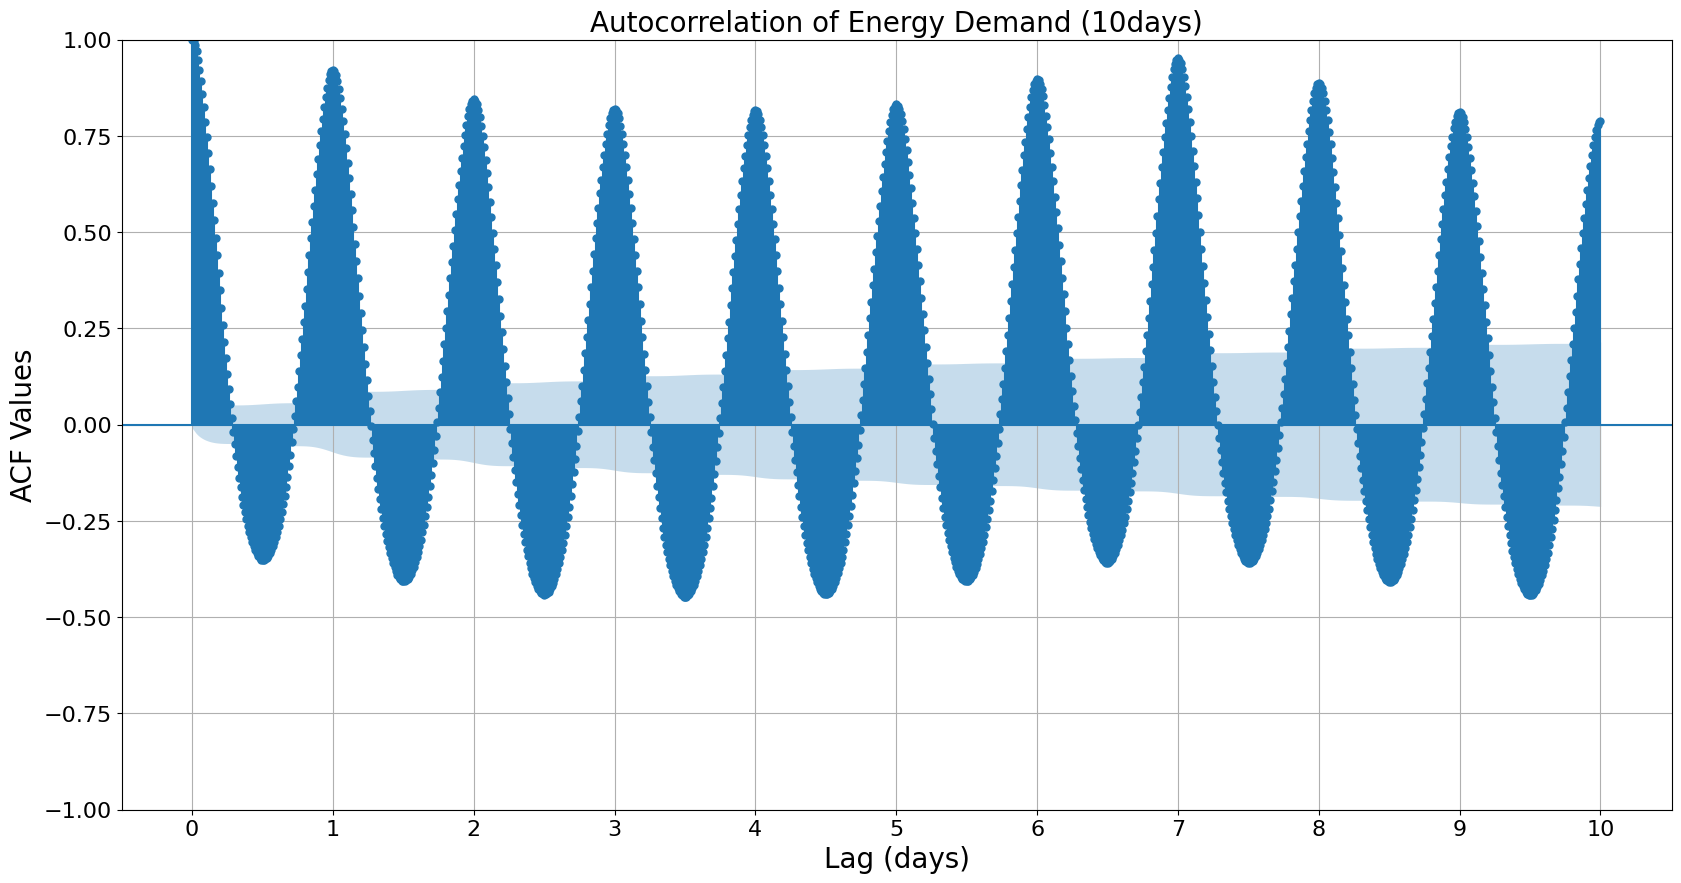

In [11]:
# Plot the autocorrelation function of demand
lags_to_show = 10 * 24 * 4  # Set the number of lags to display (10 days)
demand_autocorr = demand_df['Demand']

# Plot autocorrelation function
plot_acf(demand_autocorr, lags=lags_to_show)

# Set x-axis tick labels to show days instead of lags
plt.xticks(range(0, lags_to_show + 1, 96), range(0, 10 + 1))

# Set axis labels and title
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16)
plt.xlabel("Lag (days)",size=20)
plt.ylabel("ACF Values", size=20)
plt.title("Autocorrelation of Energy Demand (10days)",size=20)

# Show the plot
plt.grid()
plt.show()


In [12]:
# Autocorrelation coefficient for 10 days
acoeff = demand_df["Demand"].autocorr(lag=lags_to_show)
print("The Autocorrelation coefficient for 10 days is:", round(acoeff,3))

The Autocorrelation coefficient for 10 days is: 0.813


### Part 3
Monitoring time of year using a variable that ranges between 0 and 1 and showing how the demand varies over the course of the year using a graphic

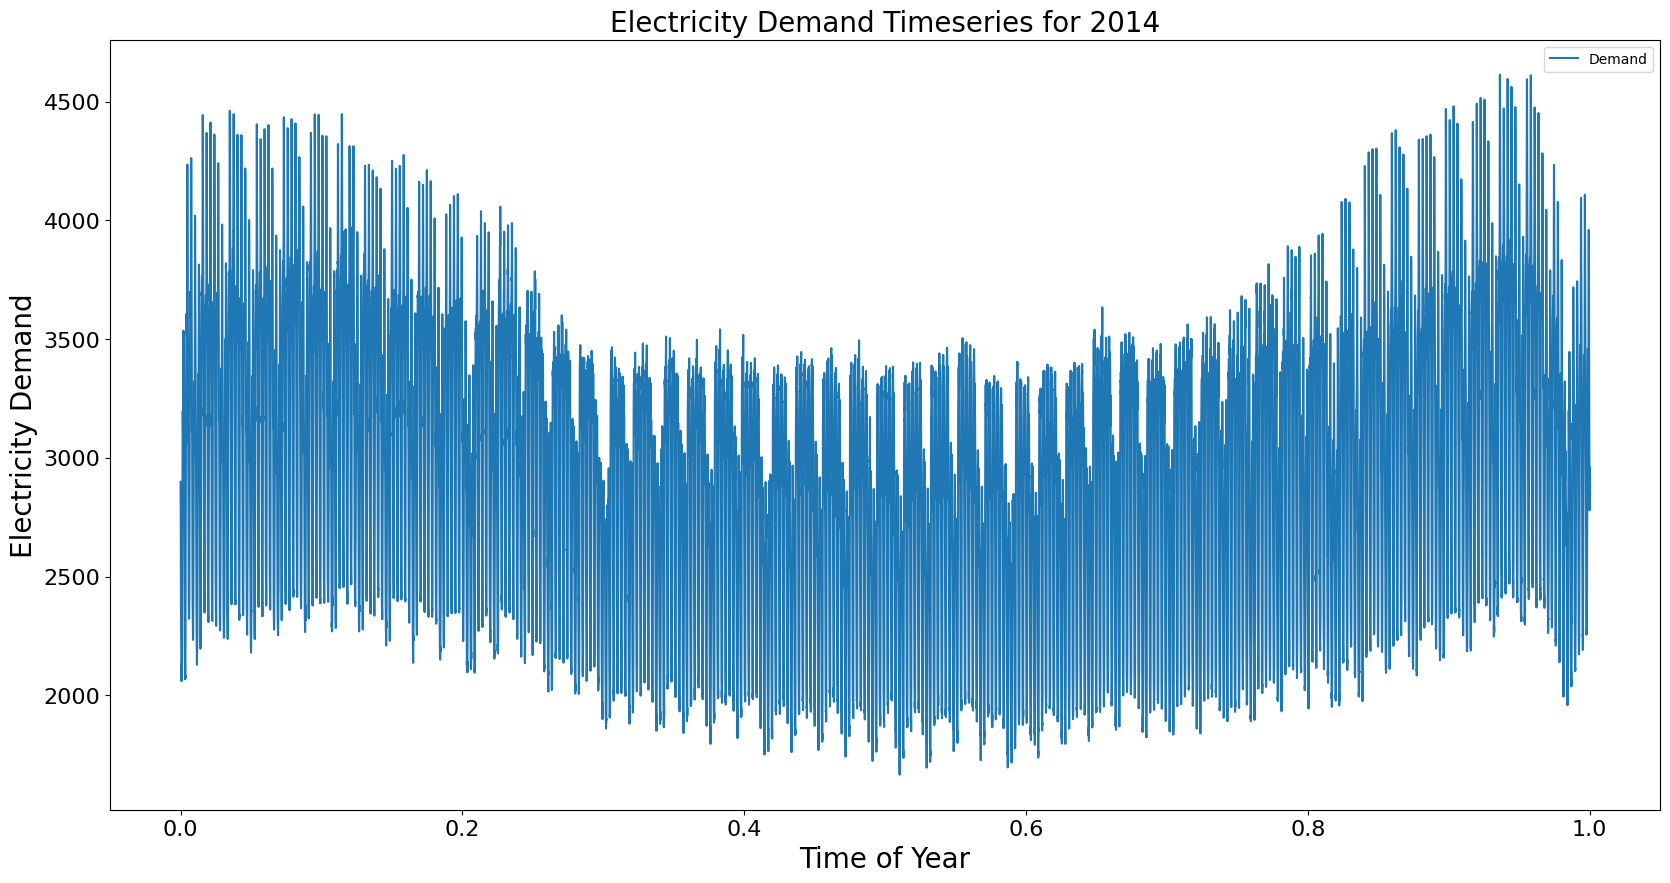

In [13]:
# Create a new column 'Time of Year' and normalize values
demand_df['time_of_year'] = [i / (demand_df.shape[0] - 1) for i in range(demand_df.shape[0])]

# Plot demand as a function of time of year
ax = demand_df.plot.line(x='time_of_year', y='Demand')

# Set axis labels and title
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16)
ax.set_title("Electricity Demand Timeseries for 2014", size=20)
ax.set_xlabel("Time of Year", size=20)
ax.set_ylabel("Electricity Demand",size=20)

# Show the plot
plt.show()


### Part 4.

For each of the 12 months of the year, calculate the average demand and displaying as a bar chart and labelling appropriately.

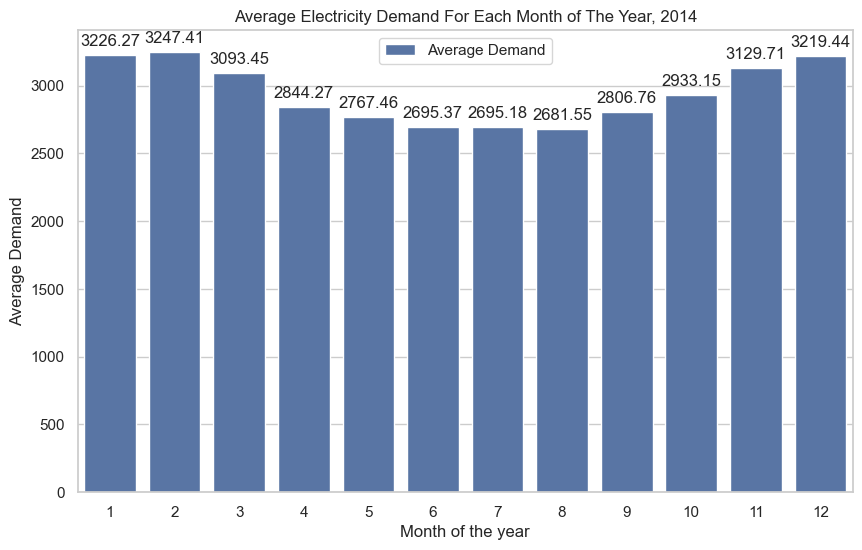

In [14]:
# Create a new column 'month'
demand_df['month'] = demand_df['timestamp'].dt.month

# Plot average demand as a function of month using Seaborn for styling
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x='month', y='Demand', data=demand_df, ci=None, label='Average Demand')

# Set axis labels and title
ax.set_title("Average Electricity Demand For Each Month of The Year, 2014")
ax.set_xlabel("Month of the year")
ax.set_ylabel("Average Demand")

# Add data labels to the bar chart
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Add legend
ax.legend()

# Show the plot
plt.show()


### Part 5.

For each of the 24 hours of the day, we will then calculate the average demand and display it as a barchart, indicating the different hours of the day. 
This graphic is often referred to as the daily demand profile

Text(0, 0.5, 'Average Demand')

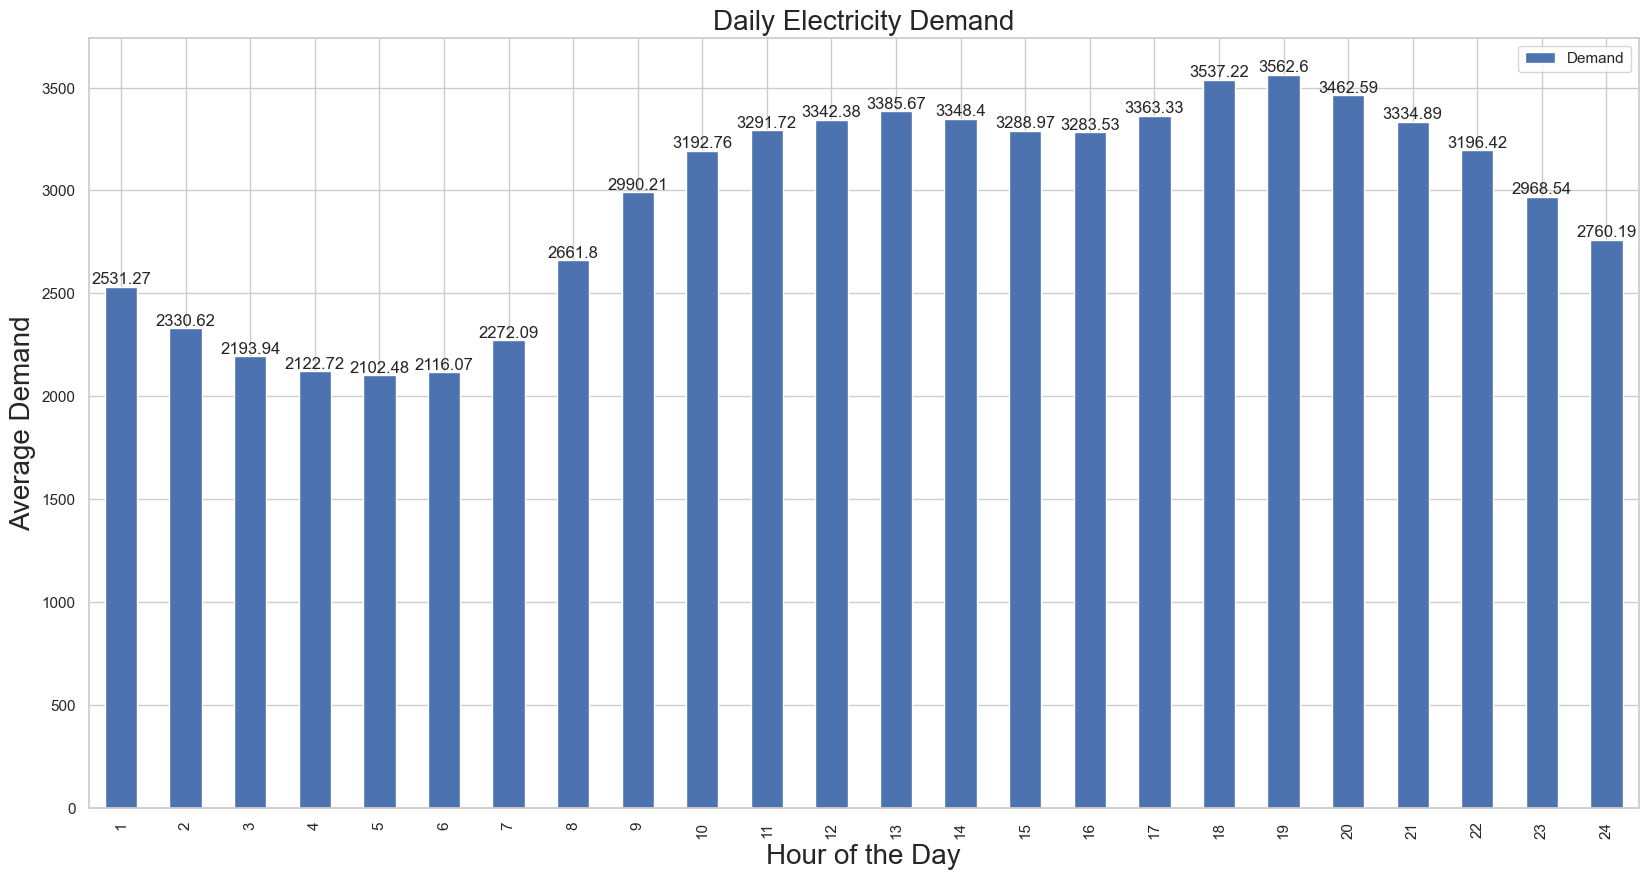

In [15]:
# Create a new column 'hour' and plot average demand as a function of hour
demand_df['hour'] = demand_df['timestamp'].dt.hour + 1
ax = demand_df.groupby('hour', as_index=False).mean().plot.bar('hour', 'Demand')

# plotting the graph
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16)
ax.set_title("Daily Electricity Demand", size=20)# graph title
ax.bar_label(ax.containers[0])
#labeling x-axis
ax.set_xlabel("Hour of the Day", size=20)
#labeling y-axis
ax.set_ylabel("Average Demand", size=20)

### Part 6
For each of the seven days of the week, calculate the average demand and display it as a bar chart. 
Does the result make sense based on intuition about electricity consumption?


<Figure size 1000x600 with 0 Axes>

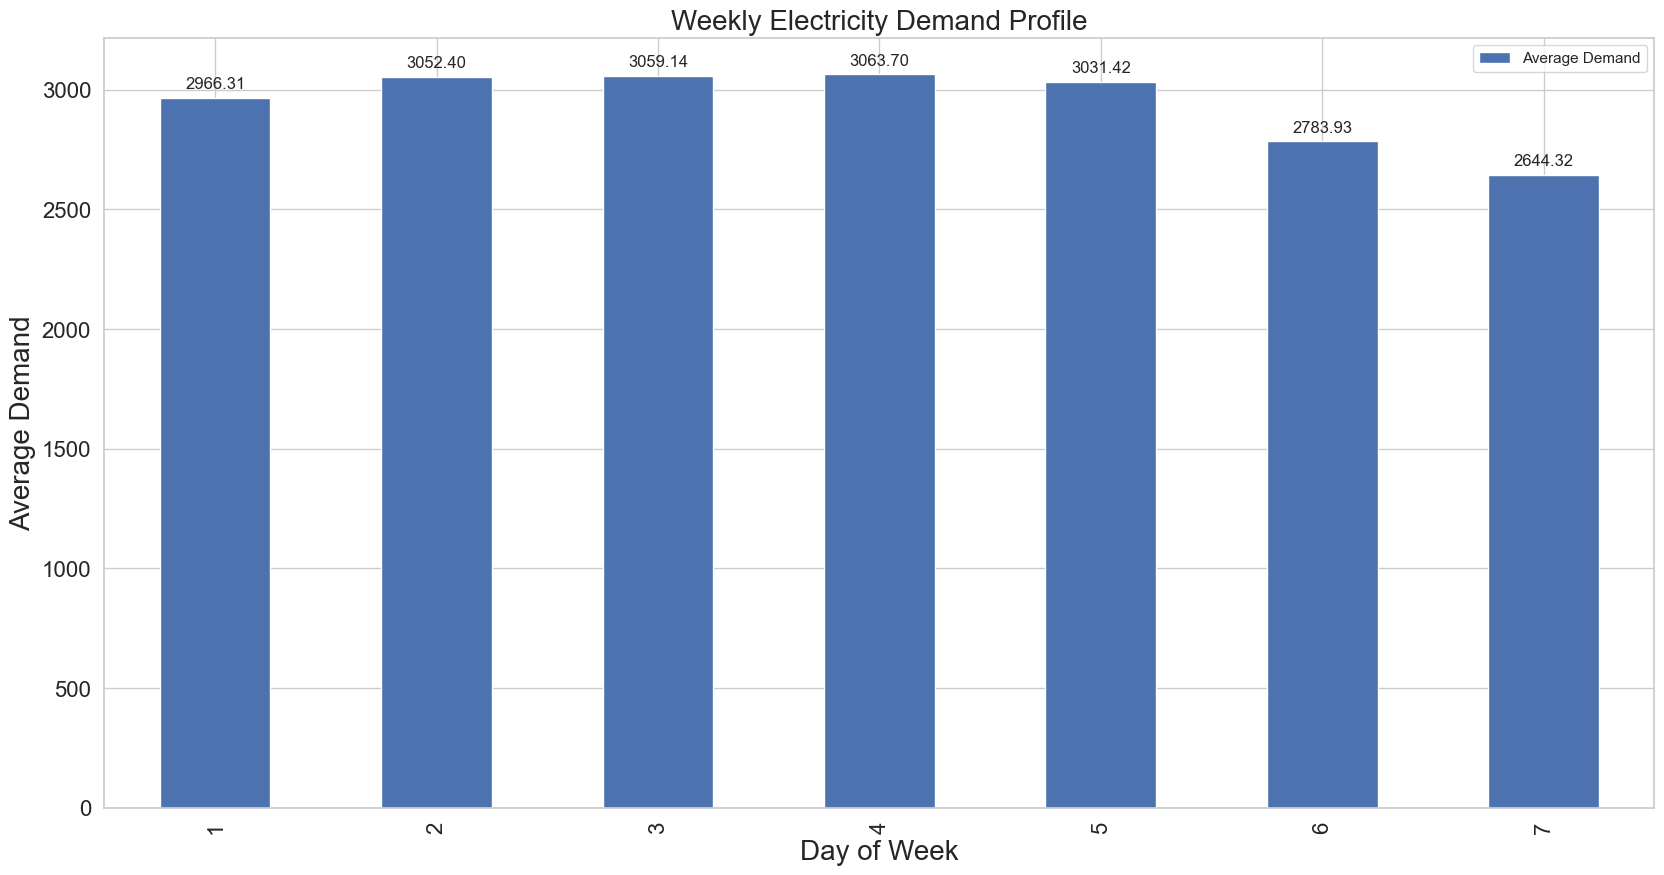

In [16]:
# Create a new column 'day_of_week'
demand_df['day_of_week'] = demand_df['timestamp'].dt.weekday + 1

# Plot average demand as a function of day of week
plt.figure(figsize=(10, 6))
ax = demand_df.groupby('day_of_week', as_index=False)['Demand'].mean().plot.bar(x='day_of_week', y='Demand')

# Set axis labels and title
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16)
ax.set_title("Weekly Electricity Demand Profile", size=20)
ax.set_xlabel("Day of Week", size=20)
ax.set_ylabel("Average Demand", size=20)

# Add data labels to the bar chart
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Add legend
ax.legend(["Average Demand"])

# Show the plot
plt.show()


### Part 7
Now we calculate a daily demand profile for each day of the week. 
This can be achieved by selecting a specific hour for each day and computing the average. 
We will show the results on a graphic with a separate profile curve for each day.

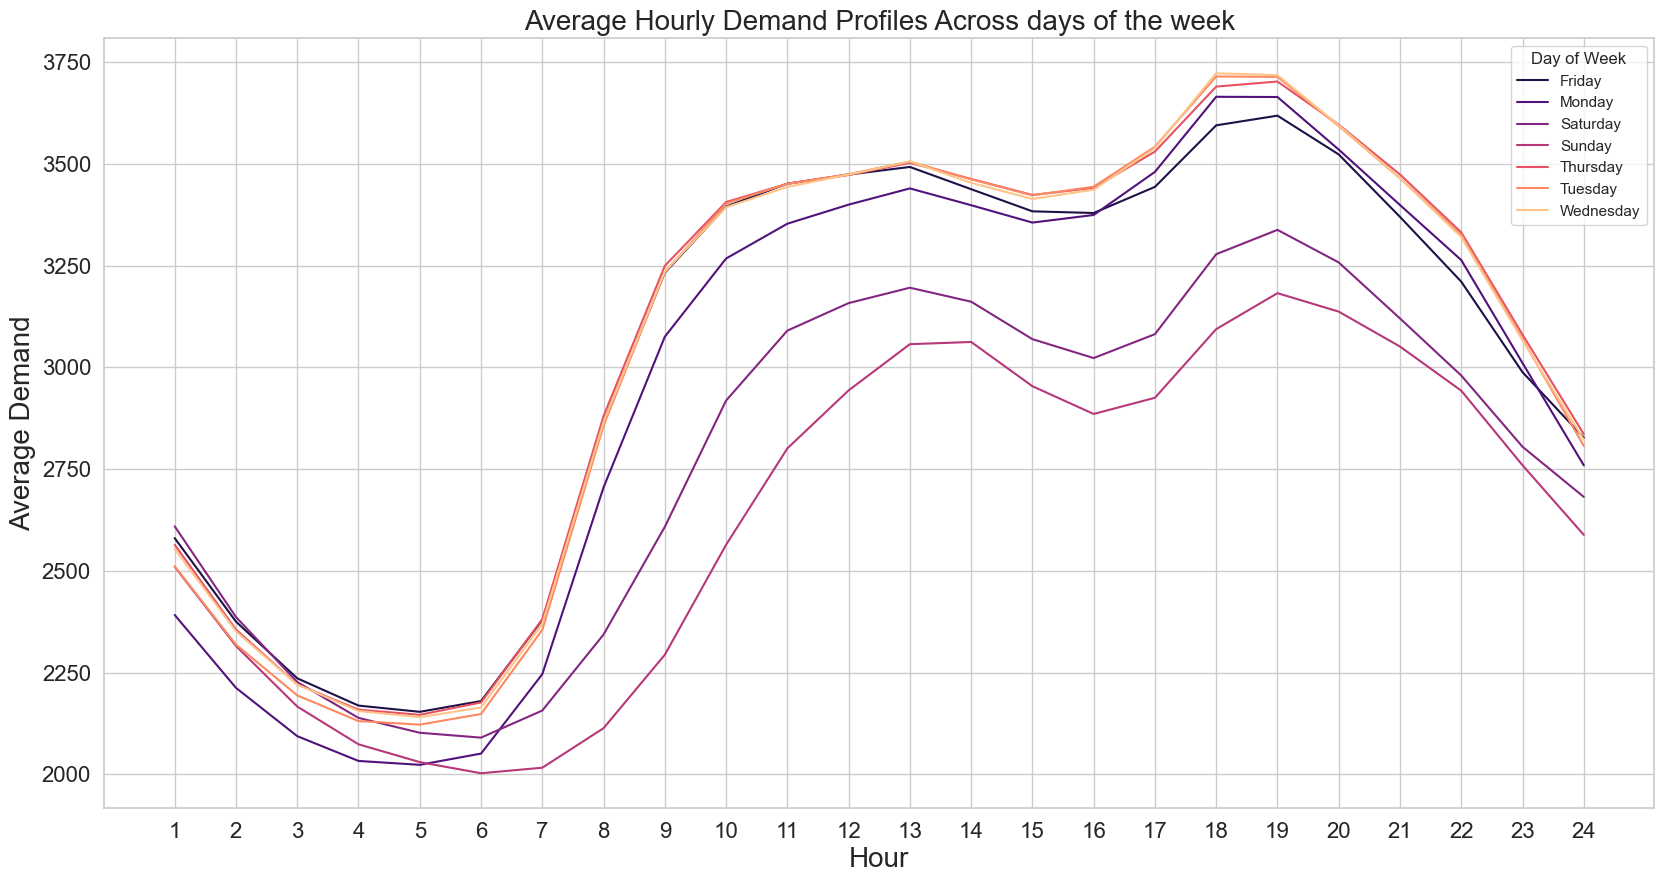

Plot displayed successfully. Hourly Analysis complete.


In [17]:
# Add a new column 'Day of Week' to the dataframe which stores the day of the week
demand_df['Day of Week'] = demand_df['timestamp'].dt.day_name()

# Create a line plot of the mean demand for each hour of the day, grouped by day of the week
plt.figure(figsize=(20, 10))

# Use Seaborn to create a line plot
ax = sns.lineplot(
    data=demand_df.groupby(['hour', 'Day of Week'], as_index=False)['Demand'].mean(), 
    x="hour", 
    y="Demand", 
    hue="Day of Week",
    palette="magma"  # Set the color palette
)

# Set axis labels and title
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16)
ax.set_title("Average Hourly Demand Profiles Across days of the week", size=20)
ax.set_xticks(range(1, 25))
ax.set_xlabel("Hour", size=20)
ax.set_ylabel("Average Demand", size=20)

# Customize the legend title
ax.legend(title="Day of Week")

# Display the plot
plt.show()

# Print a message to differentiate the output
print("Plot displayed successfully. Hourly Analysis complete.")


### Part 8
ANALYSIS
 
Is there a statistically significant difference between demand during the weekend (Saturday and Sunday) and during the working week (Monday through Friday)? 
We will perform a statistical hypothesis test, such as a t-test, in order to reach a conclusion as follows;

- Null Hypothesis: average demand over the weekend == average demand during weekdays
- Alternative Hypothesis: average demand over the weekend != average demand during weekdays

if the p-value is less than 0.005 we reject that test case

In [18]:
x = demand_df.copy()

In [19]:
x['timestamp'] = pd.to_datetime(x['timestamp'])
x.set_index('timestamp', inplace = True)

In [20]:
x.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35040 entries, 2014-01-01 00:00:00 to 2014-12-31 23:45:00
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Demand        35040 non-null  float64
 1   time_of_year  35040 non-null  float64
 2   month         35040 non-null  int32  
 3   hour          35040 non-null  int32  
 4   day_of_week   35040 non-null  int32  
 5   Day of Week   35040 non-null  object 
dtypes: float64(2), int32(3), object(1)
memory usage: 1.5+ MB


In [21]:
#separating weekends and weekdays
weekdayss = x[x.index.day_name().isin(['Saturday', 'Sunday'])]['Demand']
weekendss = x[~x.index.day_name().isin(['Saturday', 'Sunday'])]['Demand']

In [22]:
weekdayss

timestamp
2014-01-04 00:00:00    3051.0
2014-01-04 00:15:00    2985.0
2014-01-04 00:30:00    2897.0
2014-01-04 00:45:00    2815.0
2014-01-04 01:00:00    2743.0
                        ...  
2014-12-28 22:45:00    2996.0
2014-12-28 23:00:00    3013.0
2014-12-28 23:15:00    3083.0
2014-12-28 23:30:00    3050.0
2014-12-28 23:45:00    2996.0
Name: Demand, Length: 9984, dtype: float64

In [23]:
#performing a t-test
stat, pvalue = ttest_ind(weekendss, weekdayss)
print(f"The t-test statistic is {stat} with a p-value {pvalue}")

The t-test statistic is 46.54684714308395 with a p-value 0.0


In [24]:
stat

46.54684714308395

In [25]:
# Display the t-test result
print("Two-Sample T-Test Result Analysis:")

# Check if the p-value is less than the significance level (alpha)
if pvalue < 0.05:
    print("Reject the null hypothesis: average of weekend is not equal to average of weekday.")
else:
    print("Fail to reject the null hypothesis: no significant difference between average of weekend and weekday.")


Two-Sample T-Test Result Analysis:
Reject the null hypothesis: average of weekend is not equal to average of weekday.


### Part 9

Now we will divide the data into two halves and use the second half for evaluation purposes. 
We will then study the simple benchmark forecasting approach known as persistence. 

For data that does not change much from one time step to the next, we can assume that the most recent observations are a good forecast of the future. 

The forecast issued at time t for k periods ahead is simply given by y_hat(t+k) = y(t). The mean absolute error (MAE) will be calculated and ploted against forecast horizons for lead times up to one day ahead.



In [26]:
# Function to compute Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Create new columns for each forecast horizon, storing the demand shifted by that horizon
for horizon in range(1, 1 + 24 * 4):
    demand_df[f'Predict {horizon}'] = demand_df['Demand'].shift(horizon)

# Split the dataframe in half and use the second half for evaluation
df_half = demand_df.iloc[demand_df.shape[0] // 2:, :]

# Create a dictionary to store the evaluation metrics for each forecast horizon
evaluation_metrics = {
    "horizon": [],
    "MAE": [],
    "MAPE": []
}

# For each forecast horizon, compute the Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE)
for horizon in range(1, 1 + 24 * 4):
    mae = mean_absolute_error(df_half['Demand'], df_half[f'Predict {horizon}'])
    mape = mean_absolute_percentage_error(df_half['Demand'], df_half[f'Predict {horizon}'])
    evaluation_metrics['horizon'].append(horizon)
    evaluation_metrics['MAE'].append(mae)
    evaluation_metrics['MAPE'].append(mape)

# Create a dataframe from the evaluation metrics dictionary
evaluation_df = pd.DataFrame(evaluation_metrics)


In [27]:
# Convert the evaluation_metrics dictionary into a DataFrame to visualize the MAE and MAPE
evaluation_table = pd.DataFrame(evaluation_metrics)

# Display the tabulated evaluation metrics
print("Evaluation Metrics Table:")
print(evaluation_table)


Evaluation Metrics Table:
    horizon         MAE      MAPE
0         1   39.704167  1.401417
1         2   76.386187  2.694226
2         3  111.963299  3.947104
3         4  146.377283  5.162203
4         5  179.855993  6.348202
..      ...         ...       ...
91       92  219.847260  7.753356
92       93  195.831849  6.852569
93       94  173.973459  6.038328
94       95  156.427511  5.387572
95       96  148.279110  5.076438

[96 rows x 3 columns]


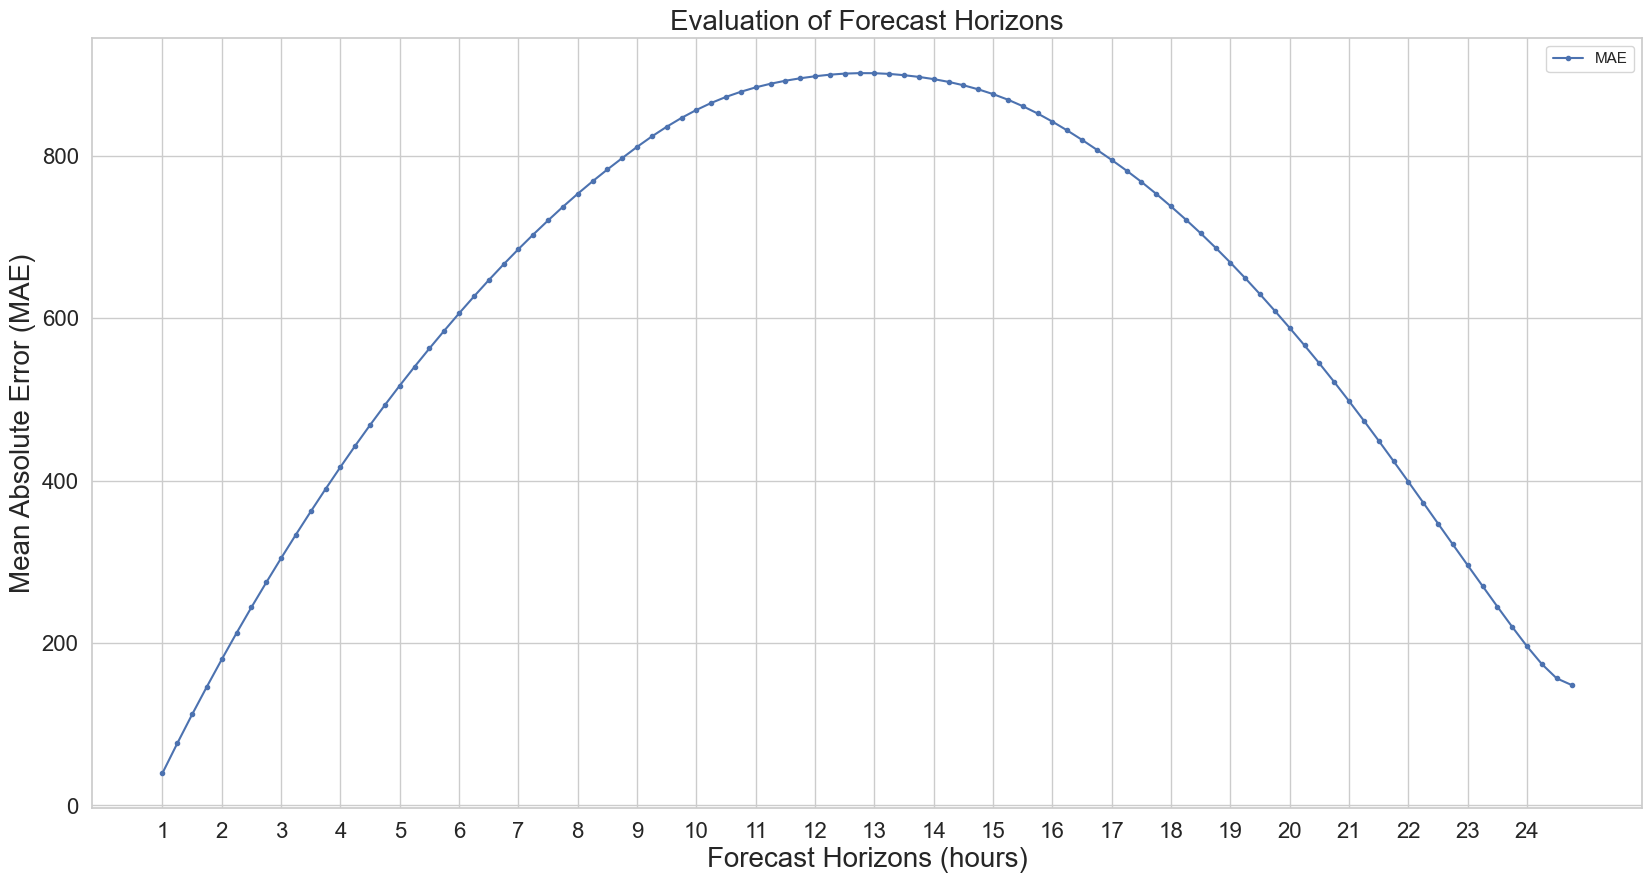

In [28]:
"""
Create a line plot of the Mean Absolute Error (MAE) as a function of 
forecast horizon

"""
# NOW WE INCREASE THE X & Y TICK DEMARCATION SIZES
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16)

# Set the style of the line plot to include dots for data points
ax = evaluation_df.plot.line(x='horizon', y='MAE', style='.-', figsize=(20, 10))

# Set the x-axis ticks to represent forecast horizons every 4 hours
ax.set_xticks(range(1, 1 + 24 * 4, 4))

# Label the x-axis ticks with corresponding forecast horizon values
ax.set_xticklabels([i // 4 + 1 for i in range(1, 1 + 24 * 4, 4)])

# Set the title of the plot
ax.set_title("Evaluation of Forecast Horizons", size=20)

# Label the x-axis with the forecast horizons
ax.set_xlabel("Forecast Horizons (hours)", size=20)

# Label the y-axis with Mean Absolute Error (MAE)
ax.set_ylabel("Mean Absolute Error (MAE)", size=20)

# Show the plot
plt.show()


### Part 10

Now we will then calculate the mean absolute percentage error for the persistence and plot this against the forecast horizon up to one day ahead.



In [29]:
# Multiply the MAPE values by 100 and store them in a new column 'MAPE_Percentage'
evaluation_df['MAPE_Percentage'] = evaluation_df['MAPE'] * 100
#

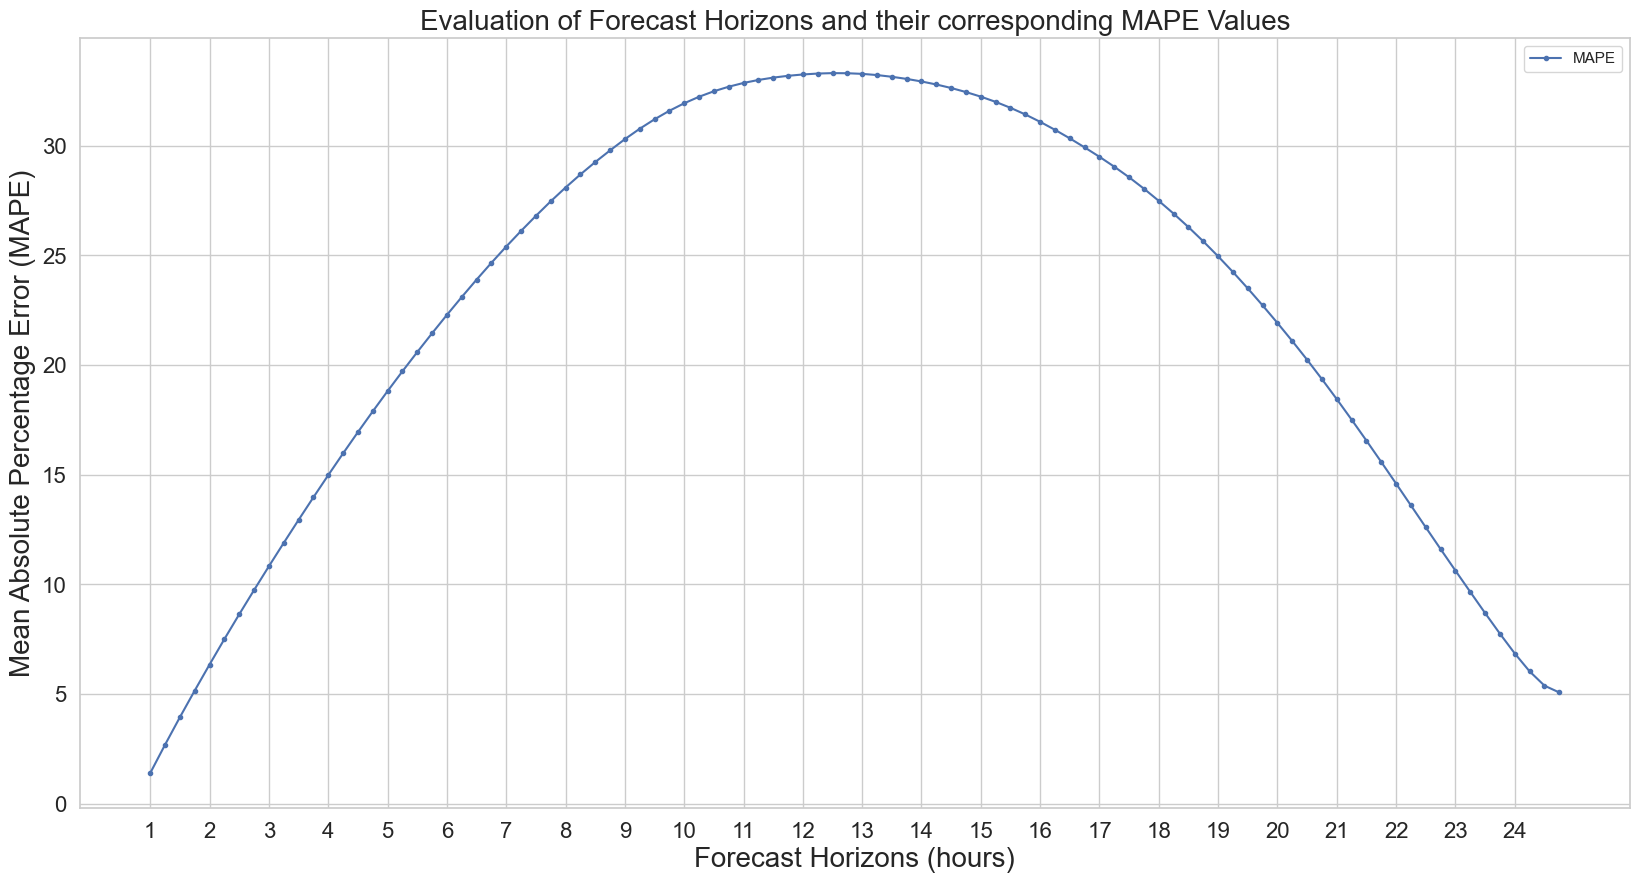

In [30]:
# Create a line plot of the Mean Absolute Percentage Error (MAPE) as a function of forecast horizon


# X & Y TICK SIZES
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16)

# Set the style of the line plot to include dots for data points
ax = evaluation_df.plot.line(x='horizon', y='MAPE', style='.-', figsize=(20, 10))

# Set the x-axis ticks to represent forecast horizons every 4 hours
ax.set_xticks(range(1, 1 + 24 * 4, 4))

# Label the x-axis ticks with corresponding forecast horizon values
ax.set_xticklabels([i // 4 + 1 for i in range(1, 1 + 24 * 4, 4)])

# Set the title of the plot
ax.set_title("Evaluation of Forecast Horizons and their corresponding MAPE Values", size=20)

# Label the x-axis with the forecast horizons
ax.set_xlabel("Forecast Horizons (hours)", size=20)

# Label the y-axis with Mean Absolute Percentage Error (MAPE)
ax.set_ylabel("Mean Absolute Percentage Error (MAPE)", size=20)

# Show the plot
plt.show()
